# AEROSP 536 Electric Propulsion: Homework 1
Jason Chen

## Problem 1
### Part (a)
See the plot below. The equation we want to use is:
$$
\frac{T}{P_{in}} = \frac{2\eta}{I_{sp}g_0}
$$

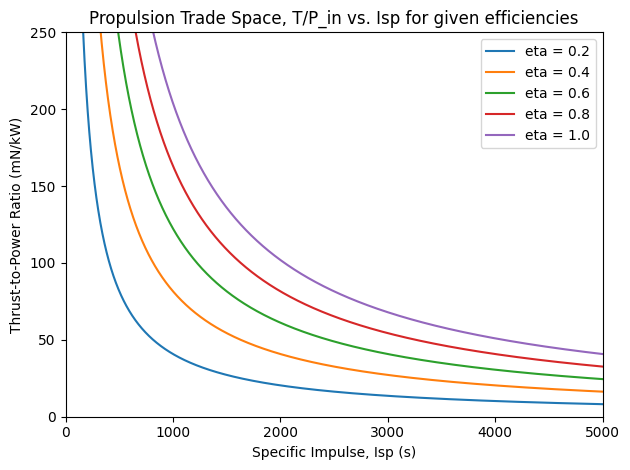

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

g0 = 9.81
etas = [0.2, 0.4, 0.6, 0.8, 1.0]

isp_min, isp_max = 0.0, 5000.0
tp_min, tp_max = 0.0, 250.0
isp = np.linspace(1e2, isp_max, 2000)

plt.figure()
for eta in etas:
    tp_ratio = ((2.0 * eta) / (isp * g0)) / 1e-6
    plt.plot(isp, tp_ratio, label=f"eta = {eta:.1f}")

plt.xlim(isp_min, isp_max)
plt.ylim(tp_min, tp_max)
plt.xlabel("Specific Impulse, Isp (s)")
plt.ylabel("Thrust-to-Power Ratio (mN/kW)")
plt.title("Propulsion Trade Space, T/P_in vs. Isp for Given Efficiencies")
plt.legend()
plt.tight_layout()
plt.show()

### Part (b)

We basically need to repeat the plot above, but with shaded regions instead.

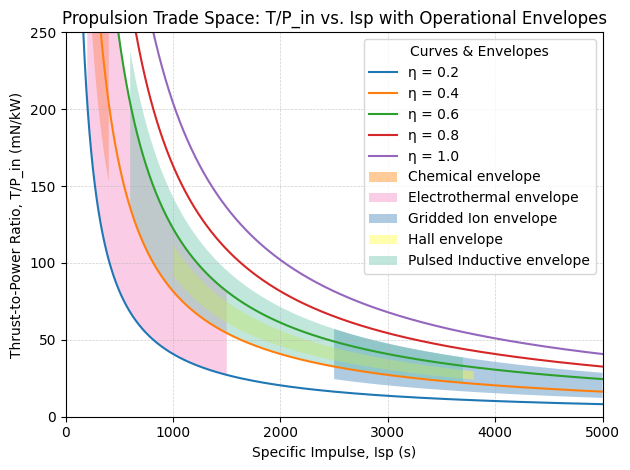

In [108]:
g0 = 9.81
etas = [0.2, 0.4, 0.6, 0.8, 1.0]

isp_min, isp_max = 0.0, 5000.0
tp_min, tp_max = 0.0, 250.0
isp = np.linspace(1e2, isp_max, 2000)

def tp_ratio_from_eta(eta, isp_vals):
    return ((2.0 * eta) / (isp_vals * g0)) / 1e-6

fig, ax = plt.subplots()
for eta in etas:
    ax.plot(isp, tp_ratio_from_eta(eta, isp), label=f"η = {eta:.1f}")

envelopes = [
    ("Chemical",        (150,  400),   (0.3, 0.9)),
    ("Electrothermal",  (200, 1500),   (0.2, 0.6)),
    ("Gridded Ion",     (2500, 10000), (0.3, 0.7)),
    ("Hall",            (1000, 3800),  (0.45, 0.55)),
    ("Pulsed Inductive",(600,  3700),  (0.4, 0.7)),
]

fill_colors = [
    "#ff7f00",
    "#f781bf",
    "#377eb8",
    "#ffff33",
    "#66c2a5" 
]

for (name, (isp_lo, isp_hi), (et_lo, et_hi)), color in zip(envelopes, fill_colors):
    # Isp segment within axis bounds
    seg_lo = max(isp_lo, isp_min)
    seg_hi = min(isp_hi, isp_max)
    if seg_hi <= seg_lo:
        continue
    isp_seg = np.linspace(seg_lo, seg_hi, 600)
    y_lo = tp_ratio_from_eta(et_lo, isp_seg)
    y_hi = tp_ratio_from_eta(et_hi, isp_seg)
    # Clip to plot y-limits so we can fill
    y_lo = np.clip(y_lo, tp_min, tp_max)
    y_hi = np.clip(y_hi, tp_min, tp_max)

    ax.fill_between(isp_seg, y_lo, y_hi, alpha=0.4, color=color,
                    label=f"{name} envelope", edgecolor="none", zorder=0)

ax.set_xlim(isp_min, isp_max)
ax.set_ylim(tp_min, tp_max)
ax.set_xlabel("Specific Impulse, Isp (s)")
ax.set_ylabel("Thrust-to-Power Ratio, T/P_in (mN/kW)")
ax.set_title("Propulsion Trade Space: T/P_in vs. Isp with Operational Envelopes")

ax.legend(loc="upper right", frameon=True, title="Curves & Envelopes")
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)
fig.tight_layout()
plt.show()

### Part (c)
The plotting with transparencies got very messy, so I drew it out on paper:

![](/home/jasonyc/sugs/536_electric_prop/hw_1_p1c.jpg)

### Part (d)
We can use:
$$
P_{in} = \frac{T I_{sp} g_0}{2 \eta}
$$
If we then use the specific impulse and efficiency for each thruster type, combined with the values of thrust given (300 mN and 1 kN), we get the following table:

| Thruster Type    | Isp (s) | Eta | P_in, 300 mN (W) | P_in, 1 kN (W) |
| ---------------- | ----------- | ----------- | ----- | ----- |
| Chemical         | 275         | 0.5         | 8.09E+2   | 2.70E+6   |
| Electrothermal   | 700         | 0.4        | 2.58E+3   | 8.58E+6   |
| Gridded Ion      | 4000        | 0.6       | 9.81E+3   | 3.27E+7   |
| Hall             | 1800        | 0.5        | 5.30E+3   | 1.77E+7  |
| Pulsed Inductive | 1200         | 0.3        | 5.89E+3   | 1.96E+7  |


### Part (e)

From these results, we want to be using hall and gridded ion thrusters for station keeping since they have the highest specific impulse and efficiencies, meaning for a given input power they need less mass, while the tradeoff is very low thrust. However it means that they can stay in orbit longer without running out of fuel, while the low thrust concern is not really needed when the delta-V requirement for station keeping is comparatively low to agile maneuver.

Electrothermal and pulsed inductive are best for agile maneuver for the same reason but opposite perspective. Chemical is also viable but the low fuel efficiency means it is not very viable as a long term maneuvering solution.

Input power is a factor, as the energy is stored in the bonds of the propellant for technical while other systems will have high power demand. There is the concern that high power = high dry mass, but given again that station keeping provides time to build up total impulse, the answers here do not change.

## Problem 2

### Part (a)

For a spacecraft (or any object), we know from the derivation of thrust as conservation of momentum as:
$$
m \frac{\vec{v}}{dt} = \vec{T} + \Sigma \vec{F}_{ext}
$$
Since we want the spacecraft to stay in orbit, we want $\vec{a}$ to equal zero, and hence thrust must be equal to the sum of external forces, $\Sigma \vec{F}_{ext}$. Considering from the problem statement that we want to consider atmospheric drag (assuming this is the only force needed to be considered), we get that the magnitude of thrust must be equal to the drag, or:

$$
T = \dot{m} I_{sp} g_0 = \frac{1}{2} \rho A C_d v^2
$$

All components on drag force are known except $v$, but since we are given altitude we can use the equation of orbital velocity (for a circular orbit) to compute the required velocity at 100 km altitude:

$$
v = \sqrt{\frac{GM}{r}}
$$

With this known, we just need to solve for the left side of the equation. Given incompressible mass flow rate:

$$
\dot{m} = \rho A v
$$

This is valid because we are assuming the intake is responsible for 100% of the propellant mass, and we know the density of air at this altitude. Rearranging the above equations, we get:

$$
\rho A v I_{sp} g_0 = \frac{1}{2} \rho A C_d v^2
$$
And solving for $I_{sp}$, we get 915.6 seconds.

### Part (b)

The minimum power can be found via:

$$
\frac{T}{P_{in}} = \frac{2\eta}{I_{sp}g_0}
$$

Solving for $P_{in}$ and the given $\eta = 0.5$, we get 638.3 kW.

## Problem 3
### Part (a)
We need to check for inconsistencies in the data provided. First, we can check the efficiency equation (we will call this Equation (1)):
$$
\eta = \frac{1}{2} \left( \frac{T^2}{\dot{m}} \right) \frac{1}{P_{in}}
$$
against the matched exit condition thrust equation (we will call this Equation(2)):
$$
F_t = \dot{m} u_e = \dot{m} (I_{sp} g_0)
$$
and subract the two to compute a residual, first in terms of mass flow rate. If the residual is significant, it means the table entries given are inconsistent. Additionally, we'll check in terms of efficiencies, where we compare the computed $\eta$ via other parameters and the reported $\eta$.

In [109]:
data = {
    'P_in'     : np.array([4.46, 1.26, 1.25, 3.26, 3.24]) * 1e3,
    'F_t'      : np.array([357.8, 248.5, 264.0, 92.7, 95.0]) * 1e-3,
    'F_t_range': np.array([  4.6,   3.3,   2.7,  2.7,  3.0]) * 1e-3,
    'eta'      : np.array([0.47, 0.39, 0.42, 0.44, 0.49]),
    'eta_range': np.array([0.01, 0.02, 0.03, 0.01, 0.02]),
    'isp'      : np.array([1196, 1086, 1132, 1163, 1235]),
    'isp_range': np.array([  15,   32,   33,   16,   16])
}
num_entries = 5
for i in range(num_entries):
    mdot_1 = data['F_t'][i] / (data['isp'][i] * 9.81)
    mdot_2 = (1/2) * (data['F_t'][i]**2) / (data['eta'][i] * data['P_in'][i])
    print(f"Residual mass flow rate for Row {i+1}: {mdot_1 - mdot_2:.2e} kg/s")
    eta_1 = data['F_t'][i]**2 / (2 * mdot_1 * data['P_in'][i])
    print(f"Efficiency computed versus reported for Row {i+1}: {eta_1:.2f} vs {data['eta'][i]:.2f}")


Residual mass flow rate for Row 1: -4.06e-08 kg/s
Efficiency computed versus reported for Row 1: 0.47 vs 0.47
Residual mass flow rate for Row 2: -3.95e-05 kg/s
Efficiency computed versus reported for Row 2: 1.05 vs 0.39
Residual mass flow rate for Row 3: -4.26e-05 kg/s
Efficiency computed versus reported for Row 3: 1.17 vs 0.42
Residual mass flow rate for Row 4: 5.13e-06 kg/s
Efficiency computed versus reported for Row 4: 0.16 vs 0.44
Residual mass flow rate for Row 5: 5.00e-06 kg/s
Efficiency computed versus reported for Row 5: 0.18 vs 0.49


From these results, we can see that although mass flow rate is consistent, the computed efficiency for Rows 2 and 3 are over unity (which is not possible assuming the only source of power to accelerate the plasma originates from the input power given in $P_{in}$), while for Rows 4 and 5, they are inconsistent with the reported values. 

### Part (b)
We're given a chart of $F_t$ v.s. $I_{sp}$ and lines of constant input power $P_{in}$ and mass flow rate of Xenon $\dot{m}$. Since the company evaluated their performance at $100 \textrm{ W}$ and $5.2 \textrm{ mN}$, we can read the chart:

![](/home/jasonyc/sugs/536_electric_prop/hw_1_p3b.png)

We see that the intersection approximately yields $\dot{V} = 12 \textrm{ SCCM}$ and $I_{sp} = 440 \textrm{ s}$. Converting the volumetric flow rate to a mass flow rate requires knowledge that a standard cubic centimeter per minute is actually a molar flow rate, but expressed as a volumetric flow rate at standard conditions. Assuming the U.S. standard conditions of 293 K and 101.3 kPa, we get the density of Xenon at these conditions (via NIST REFPROP) as $\rho_{STP} = 5.49 \textrm{ kg/m}^3$, and so $\dot{m}_{\textrm{Xe}} = \dot{V}_{SCCM}/\rho_{STP}$

Alternatively, if we don't want to guess the SCCM trace, we can also use Equation (2) to find $\dot{m}$ from the given thrust and $I_{sp}$ values, for which we get $\dot{m} = 1.2 \times 10^{-6} \textrm{kg/s}$. We can now plug into Equation (1) directly to get:

$$
\eta = \frac{1}{2} \left( \frac{T^2}{\dot{m}} \right) \frac{1}{P_{in}} = 11.2 \%
$$




## Problem 4
The scenario given is the extreme case where the propulsion system is a laser, where the reaction mass is photons.

### Part (a)
Thrust to power ratio given 100% efficiency is:
$$
\frac{T}{P_{in}} = \frac{2\eta}{u_e} = \frac{2}{c} \approx 6.67 \times 10^{-9} \textrm{ s/m}
$$

### Part (b)
Given that state-of-the-art EP systems can generate about 350 mN at 5 kW, how much power would it take for the laser propulsion system to generate the same thrust?

The inverse of what we found above can tell us (assuming a linear relationship between input power and thrust generation):
$$
(350 \textrm{ mN})\left( \frac{T}{P_{in}} \right)^{-1} = 52.5 \textrm{ MW}
$$

### Part (c)
I would not use laser propulsion. As seen above, the power requirement to operate laser propulsion at EP thrust levels (which is already very low, which contributes to a trade of transit time) is very high, which is over ~2 orders of magnitude more than the power produced by the solar arrays on the ISS. The thrust and power trade is simply too impractical, unless we are constructing an interstellar probe with a nuclear reactor.

## Problem 5
To solve this problem, we start with the definition of thrust, neglecting the pressure thrust term (as is common with most EP devices) and assuming constant density as the problem states:

$$
\vec{T} = -\dot{m} \vec{u}_{\textrm{eff}} = - \int_{A_e} \rho_e \vec{u}_e (\vec{u}_e \cdot \hat{n}) dA_e = - \rho_e \hat{n} \int_{A_e} (\vec{u}_e \cdot \hat{n}) (\vec{u}_e \cdot \hat{n}) dA_e
$$

From the definition of mass flow rate:

$$
\dot{m} = \rho A u = \rho_e \int_{A_e} (\vec{u_e} \cdot \hat{n}) dA_e
$$

We can rearrange:
$$
|\vec{u}_{\textrm{eff}}| = \frac{\int_{A_e} (\vec{u}_e \cdot \hat{n}) (\vec{u}_e \cdot \hat{n}) dA_e}{\int_{A_e} (\vec{u_e} \cdot \hat{n}) dA_e}
$$

Now, we can write the area integral as a double integral in cylindrical coordinates. Let's first tackle the denominator, i.e. mass flow rate. Recall that when integrating in cylindrical coordinates, we need to include the Jacobian $r$:

$$
\int_{A} (\vec{u} \cdot \hat{n}) dA = \int_{0}^{2\pi} \int_{0}^{R} (\vec{u} \cdot \hat{n}) r dr d\theta
$$

From the problem statement, we know that the given velocity function has a uniform divergence angle $\theta_D = 25$ as measured from the nozzle axis, meaning:

$$
\vec{u}(r) \cdot \hat{n} = |\vec{u}|(r) |\hat{n}| \cos{\theta_D}
$$

from the definition of a dot product, and thus:
$$
\int_{A} (\vec{u} \cdot \hat{n}) dA = \int_{0}^{2\pi} \int_{0}^{R} \left( u_0 e^{-r^2/R^2} \right) \cos{\theta_D} r dr d\theta
$$

When doing a u-substitution of $u = r^2$, we can rewrite:

$$
= \frac{1}{2}u_0 \cos{\theta_D} \int_{0}^{2\pi} \int_{r_1=0}^{r_2=R} e^{-u/R^2} du d\theta
$$

Further doing a substitution of $v = -u/R^2$ and taking care to rewrite the integral bounds:

$$
= -\frac{1}{2}u_0 R^2 \cos{\theta_D} \int_{0}^{2\pi} \int_{v_1=0}^{v_2=-1} e^{v} dv d\theta
$$

We can now easily compute the antiderivatives and solve the definite integral, which results in:
$$
\int_{A} (\vec{u} \cdot \hat{n}) dA = \frac{1}{2}u_0 R^2 \cos{\theta_D} \left( 1-e^{-1} \right) (2\pi)
$$

We can repeat this process for the integral in the numerator, which instead has an integrand of $(\vec{u} \cdot \hat{n})^2$. Work is not shown here for brevity, but the  was checked symbolically with Wolfram Mathematica to be:

$$
\int_{A} (\vec{u} \cdot \hat{n})(\vec{u} \cdot \hat{n}) dA = \frac{1}{2} u_0^2 R^2 (\cos{\theta_D})^2 \left( 1-e^{-2} \right) \pi
$$

Thus, the ratio of these (and therefore the effective exhaust velocity) is:
$$
|\vec{u}_{\textrm{eff}}| = \frac{\frac{1}{2} u_0^2 R^2 (\cos{\theta_D})^2 \left( 1-e^{-1} \right) \left( 1+e^{-1} \right) \pi}{\frac{1}{2}u_0 R^2 \cos{\theta_D} \left( 1-e^{-1} \right) (2\pi)} = \frac{1}{2} u_0 \cos{\theta_D} \left( 1+e^{-1} \right) \approx 1952.6 \textrm{ m/s}
$$

Comparing with the maximum local axial component, i.e. the maximum of the function $u_0 e^{-r^2/R^2} \cos{\theta_D}$, which by inspection occurs when $r=0$ since this is where $e^{r^2/R^2}$ is at its minimum, gives $2854.9 \textrm{ m/s}$. Thus, we can clearly see that simply computing the maximum component to use as the effective exhaust velocity will severly overestimate the actual performance of the engine.

## Problem 6
The Psyche mission makes use of four Maxar SPT-140 Hall thrusters that when operating at 4 kW have a thrust of 235 mN and a specific impulse of 1770 s each. The total impulse requirement for this mission is 13.6 MN-s.

### Part (a)
To find the required operating time and propellant mass given the total impulse requirement, we use the definition of specific impulse as the total impulse over the weight of propellant:

$$
I_{sp} = \frac{I_t}{m_p g_0}
$$

so $m_p = 783.2 \textrm{ kg}$. Then, we can use mass flow rate and the total propellant mass to find the needed burn time:

$$
t_b = \frac{m_p}{\dot{m}} = \frac{m_p}{F/(I_{sp}g_0)} = 16,076 \textrm{ hours}
$$

### Part (b)
We cannot assume here that the efficiency stays constant, but we can solve for total impulse through another avenue. We know that the mass of the propellant required stays constant from Part (a) assuming $I_{sp}$ is constant (which is a better assumption than power efficiency), meaning still, $m_p = 783.2 \textrm{ kg}$. Now, we can solve for the mass flow rate that must be supplied given the propellant mass and operating time:

$$
\dot{m} = \frac{m_p}{t_b} = \frac{783.2 \textrm{ kg}}{10362 \textrm{ hours}} = 2.1 \times 10^{-5} \textrm{ kg/s}
$$

Now we can find the thrust that this corresponds with via $F = \dot{m}(I_{sp}g_0) = 365 \textrm{ mN}$ and multiply by the known burn time to get the total impulse:

$$
I_t = F t_b = 13.599 \textrm{ MN-s}
$$

This result is extremely close to the requirement of $13.6 \textrm{ MN-s}$ and can be dismissed as rounding error, and the final answer is **yes, the requirement is satisfied.**

### Part (c)
The total impulse delivered for simulation #3 can be computed via a trapezoidal integration (code below) of the given CSV file, which yields $2.48 \textrm{ MN-s}$, while the total impulse delivered if the thrust stayed constant from the beginning (a simple area of a rectange) is $2.54 \textrm{ MN-s}$ for a difference of $6.5 \textrm{ kN-s}$.

Simulation #4 delivers $2.44 \textrm{ MN-s}$ for a difference with #3 of $4.8 \textrm{ kN-s}$.

In [110]:
import pandas as pd

csv_path = 'Psyche_Thrust_Variation.csv'
df = pd.read_csv(csv_path)
thrust3 = df['Simulation 3'].values * 1e-3  # mN to N
thrust4 = df['Simulation 4'].values * 1e-3  # mN to N
time_s = df['Time (Hours)'].values * 3600   # hours to seconds

# Trapezoidal integration for total impulse (N-s) using np.trapezoid
impulse3 = np.trapezoid(thrust3, time_s)
impulse3_const = thrust3[0] * (time_s[-1] - time_s[0])
impulse4 = np.trapezoid(thrust4, time_s)

print(f"Total impulse for Simulation 3: {impulse3:.1f} N-s")
print(f"Total impulse for Simulation 3 (constant): {impulse3_const:.1f} N-s")
print(f"Total impulse for Simulation 4: {impulse4:.1f} N-s")
print(f"Difference between #3 AND #4: {abs(impulse3 - impulse4):.1f} N-s")

Total impulse for Simulation 3: 2482704.0 N-s
Total impulse for Simulation 3 (constant): 2547504.0 N-s
Total impulse for Simulation 4: 2435103.0 N-s
Difference between #3 AND #4: 47601.0 N-s


### Part (d)

Since the variation in thrust is not attributed to power input (set at $P_{in} = 4 \textrm{ kW}$) or mass flow rate, we can look at the graph and for a given thrust value $T_1$ at a point in time, know that:
$$
\dot{m} = \frac{T_1}{I_{sp (1)} g_0} = \frac{T_1^2}{2 \eta_1 P_{in}}
$$

However, there is only one equation here and two unknowns, which are $I_{sp (1)}$ and $\eta_1$. Even if we use the fact that we know mass flow rate is constant for the entire test to get more equations, such as considering the next data point (subscripted with $(2)$), we get that:
$$
\frac{T_1}{I_{sp (1)} g_0} = \frac{T_1^2}{2 \eta_1 P_{in}} = \frac{T_2}{I_{sp (2)} g_0} = \frac{T_2^2}{2 \eta_2 P_{in}}
$$
Which still does not give us enough information to solve singularly. We have two options: to parametrize specific impulse and efficiency with mass flow rate (effectively lumping two unknowns into one, but maintaining the correct shape of the solution since mass flow rate is a constant), or use the data point given at the beginning of the problem and trying to extrapolate with values on the graph (since both are given at 4 kW). We will do the former.

If we solve for $I_{sp (1)} \dot{m}$ and $\eta_1 \dot{m}$ from the first equation, we get the following plots:

<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_249521/4190853604.py:22: SyntaxWarning: invalid escape sequence '\c'
  fig.suptitle('Comparison of $I_{sp} \cdot \dot{m}$ and $\eta \cdot \dot{m}$ for Simulation 3')


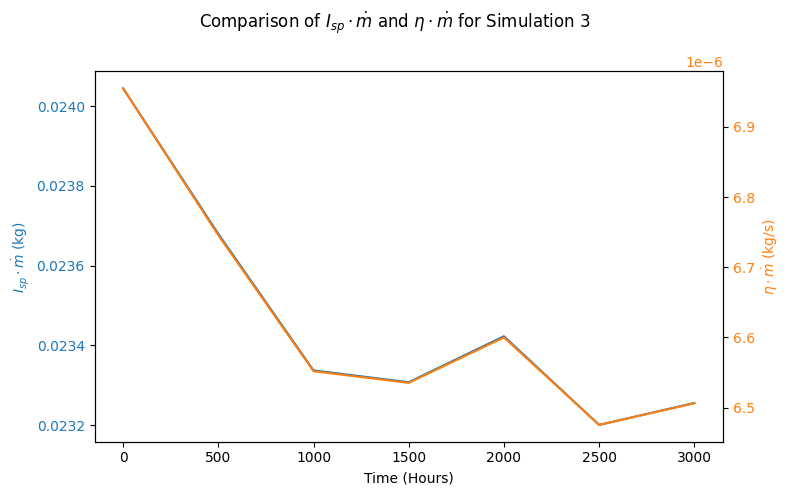

In [111]:
P_in = 4000  # W
thrust = df['Simulation 3'].values * 1e-3  # mN to N

Isp_mdot = thrust / g0
eta_mdot = thrust**2 / (2 * P_in)
time = df['Time (Hours)']

fig, ax1 = plt.subplots(figsize=(8,5))

color1 = 'tab:blue'
ax1.set_xlabel('Time (Hours)')
ax1.set_ylabel(r'$I_{sp} \cdot \dot{m}$ (kg)', color=color1)
ax1.plot(time, Isp_mdot, color=color1, label=r'$I_{sp} \cdot \dot{m} = T \cdot g_0$')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel(r'$\eta \cdot \dot{m}$ (kg/s)', color=color2)
ax2.plot(time, eta_mdot, color=color2, label=r'$\eta \cdot \dot{m} = T^2 / (2 P_{in})$')
ax2.tick_params(axis='y', labelcolor=color2)

fig.suptitle('Comparison of $I_{sp} \cdot \dot{m}$ and $\eta \cdot \dot{m}$ for Simulation 3')
fig.tight_layout()
plt.show()

### Part (e)

If we want to achieve the total impulse requirement of 13.6 MN-s, we can just take the exact impulse (area under the curve) for Simulations #3 and #4, subtract it from this budget, and see how much burn time we have left.

Repeating from above:
```
Total impulse for Simulation 3: 2482704.0 N-s
Total impulse for Simulation 4: 2435103.0 N-s
```

In [114]:
# All in N-s below
budget = 13.6e6
sim_3 = 2482704.0
sim_4 = 2435103.0
sim_3_final_thrust = (df['Simulation 3'].values * 1e-3)[-1]
sim_4_final_thrust = (df['Simulation 4'].values * 1e-3)[-1]
print(f"Remaining burn time for Simulation 3: {(budget - sim_3) / sim_3_final_thrust / 3600:.2f} hours")
print(f"Remaining burn time for Simulation 4: {(budget - sim_4) / sim_4_final_thrust / 3600:.2f} hours")
print(f"Total operational time for Simulation 3: {3000 + (budget - sim_3) / sim_3_final_thrust / 3600:.2f} hours")
print(f"Total operational time for Simulation 4: {3000 + (budget - sim_4) / sim_4_final_thrust / 3600:.2f} hours")

Remaining burn time for Simulation 3: 13536.15 hours
Remaining burn time for Simulation 4: 13825.61 hours
Total operational time for Simulation 3: 16536.15 hours
Total operational time for Simulation 4: 16825.61 hours


From Part (a), the total operational time should be around 16000 hours. With NASA's margin of 50%, that yields around 24000 hours. This is much, much more than the total operational times computed above (for both simulations), so yes, this is an adequate margin to account for the variations stated.